In [33]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA



In [34]:
!ls

'ANOVA attempt3.ipynb'		 'Data Processing.ipynb'  'attempt 1.ipynb'
'ANOVA attempt4 (worked).ipynb'  'NN attempt 6.ipynb'	  'attempt 2.ipynb'
 Beer_Dataset.csv		 'TSNE attempt 7.ipynb'
 Beer_Dataset2.csv		  Water_Dataset.csv


In [35]:
beer = pd.read_csv("Beer_Dataset2.csv")

In [36]:
beer

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,7,8,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1
0,0,8.620,99.92455,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,10563.466360,61628.838770,32102.036150,16036.452060,19583.034290,34839.586910,24215.574190,26847.195870,7615.993482,14507.788630
1,1,2.028,99.92456,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,0.000000,120646.935400,79366.881980,43035.822300,37163.403620,36872.356070,59943.191070,15221.700980,0.000000,60552.112660
2,2,1.623,99.92460,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,875.384277,85265.579840,67347.691220,55966.669410,60228.257280,14277.948450,26484.025280,28578.299010,1237.980317,48038.121160
3,3,9.128,99.92467,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,16156.162390,113575.834700,52652.490790,65286.116680,30642.027650,89657.372260,116968.968500,27727.737190,17851.978290,44653.332550
4,4,8.925,99.92481,Unknown,[M-H]-,NaN,0.03,True,NaN,NaN,...,21890.798440,100697.304100,43298.215030,34068.225520,24606.922880,75265.668770,26663.392210,52700.087160,18222.944900,15594.820940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,10810,2.738,986.31675,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,0.000000,5378.062563,9291.234846,4720.779080,4633.164994,7999.560728,13120.698450,6758.874942,0.000000,6570.677826
10811,10811,3.245,987.50137,w/o MS2: Hederagenin base + O-dHex-Hex-Hex,[M-H]-,NaN,0.01,True,6.9,987.51392,...,0.000000,2953.232074,5512.150894,2113.845978,3088.989266,2839.170389,10628.574660,2357.221854,0.000000,2371.273309
10812,10812,2.333,990.29031,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,0.000000,5393.739901,2709.341208,1203.474892,767.478226,1649.083713,512.948664,13472.807120,0.000000,3648.060895
10813,10813,2.840,991.33838,Unknown,[M-H]-,NaN,0.14,True,NaN,NaN,...,0.000000,8818.918344,10795.305250,11375.458300,9576.179240,28849.763260,5447.103743,13892.908920,0.000000,7960.345000


In [37]:
beer.isnull().sum()

Alignment ID       0
Average Rt(min)    0
Average Mz         0
Metabolite name    0
Adduct type        0
                  ..
4.1                0
5.1                0
6.1                0
7.1                0
8.1                0
Length: 122, dtype: int64

In [38]:
beer.index

RangeIndex(start=0, stop=10815, step=1)

In [39]:
beer.columns

Index(['Alignment ID', 'Average Rt(min)', 'Average Mz', 'Metabolite name',
       'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned',
       'Reference RT', 'Reference m/z',
       ...
       '7', '8', '1.1', '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1'],
      dtype='object', length=122)

In [40]:
#dropping unnecessary columns

beer.drop('1.1', inplace=True, axis=1)
beer.drop('2.1', inplace=True, axis=1)
beer.drop('3.1', inplace=True, axis=1)
beer.drop('4.1', inplace=True, axis=1)
beer.drop('5.1', inplace=True, axis=1)
beer.drop('6.1', inplace=True, axis=1)
beer.drop('7.1', inplace=True, axis=1)
beer.drop('8.1', inplace=True, axis=1)
beer.drop('1', inplace=True, axis=1)
beer.drop('2', inplace=True, axis=1)
beer.drop('3', inplace=True, axis=1)
beer.drop('4', inplace=True, axis=1)
beer.drop('5', inplace=True, axis=1)
beer.drop('6', inplace=True, axis=1)
beer.drop('7', inplace=True, axis=1)
beer.drop('8', inplace=True, axis=1)

columns_to_drop = ['Average Rt(min)', 'Average Mz', 'Metabolite name', 'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned', 'Reference RT', 'Reference m/z', 'Formula', 'Ontology', 'INCHIKEY', 'SMILES', 'Annotation tag (VS1.0)', 'RT matched', 'm/z matched', 'MS/MS matched', 'Comment', 'Manually modified for annotation', 'Manually modified for quantification','Isotope tracking parent ID', 'Isotope tracking weight number', 'RT similarity', 'm/z similarity','Simple dot product','Weighted dot product','Reverse dot product','Matched peaks count','Matched peaks percentage','Total score','S/N average','Spectrum reference file name','MS1 isotopic spectrum','MS/MS spectrum', 'Alignment ID']  # List of column names to drop
beer = beer.drop(columns=columns_to_drop)


In [41]:
beer

,C_All_QC1,C_All_QC2,C_BLD_1,C_BLD_2,C_BLD_QC,C_GER_1,C_GER_2,C_GER_3,C_GER_4,C_GER_5,...,B_SOU_1,B_SOU_2,B_SOU_QC,B_STU_1,B_STU_2,B_STU_QC,B_Water,B_WHE_1,B_WHE_2,B_WHE_QC
0,14285,70286,74725,94139,61199,86427,77152,96598,98106,93064,...,73719,89146,74013,28299,33737,95728,5178,76578,65488,79130
1,0,168078,97020,177158,169194,167099,175199,96188,184790,94333,...,62209,118909,59463,2817,8898,0,0,126048,69649,78440
2,0,97993,101905,67187,50003,105860,91105,311865,106703,97070,...,72732,71136,64766,506,4056,0,0,81025,75504,118071
3,23503,125571,129359,141997,131331,130056,132522,135759,136604,173657,...,138518,117891,166974,39029,56986,28977,3533,109281,118129,114948
4,19943,106607,112249,175515,112077,137850,114639,119590,120960,126641,...,98157,106562,101819,110164,151687,32366,9005,96784,102383,100782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,21723,5497,15012,585,8519,9754,14434,6748,11305,10892,...,12505,29202,17793,14726,7862,6355,0,2404,885,8111
10811,12596,8671,0,0,566,0,11574,0,0,0,...,8653,0,16576,0,2209,1795,0,3128,6292,916
10812,3022,5616,3517,679,0,0,0,0,0,1844,...,0,1546,0,3243,2985,6378,0,7053,0,2866
10813,34593,26920,35914,275,26585,6385,26056,34514,1425,27827,...,9596,1243,558,25771,25472,23963,0,14421,13217,20525


In [42]:
#checking for missing values
beer.isnull().sum()

C_All_QC1    0
C_All_QC2    0
C_BLD_1      0
C_BLD_2      0
C_BLD_QC     0
            ..
B_STU_QC     0
B_Water      0
B_WHE_1      0
B_WHE_2      0
B_WHE_QC     0
Length: 71, dtype: int64

In [43]:
row_names = beer.index.tolist()
print(row_names)
row_names_count = len(beer.index)
print("Number of row names:", row_names_count)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Beer Sample Abbreiviations
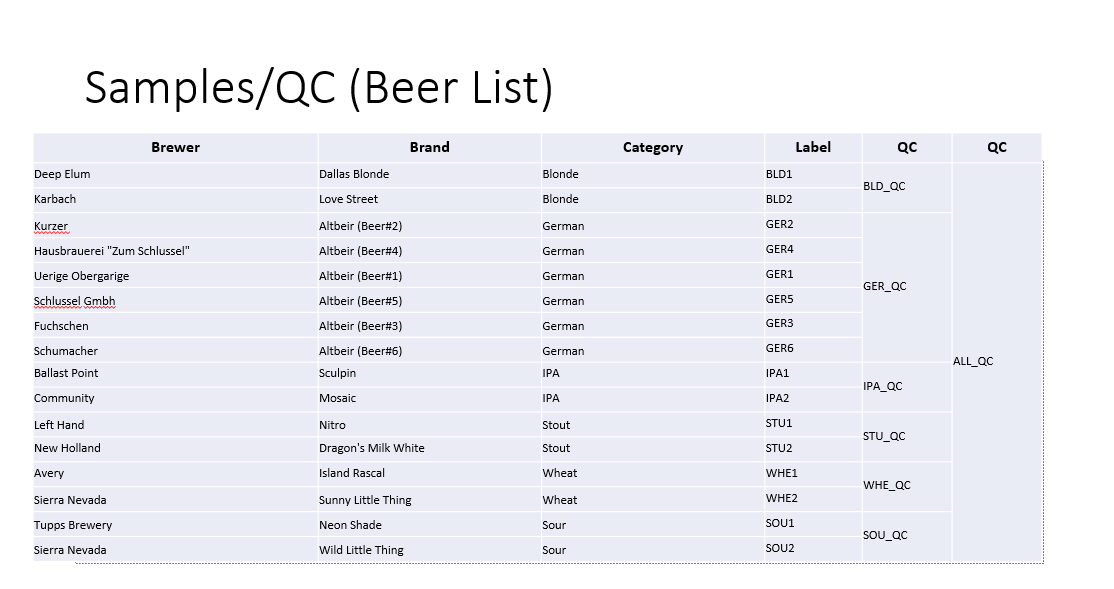

In [44]:
#transposing the dataset
beer = beer.T

In [45]:
beer

,0,1,2,3,4,5,6,7,8,9,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
C_All_QC1,14285,0,0,23503,19943,44285,21736,0,0,21406,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
C_All_QC2,70286,168078,97993,125571,106607,140786,116265,174589,284981,218494,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
C_BLD_1,74725,97020,101905,129359,112249,144078,121089,358711,181429,225109,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
C_BLD_2,94139,177158,67187,141997,175515,50697,228039,178905,264800,206247,...,0,0,657,0,30023,585,0,679,275,0
C_BLD_QC,61199,169194,50003,131331,112077,145360,121956,159002,232005,222046,...,0,0,5363,0,31380,8519,566,0,26585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_STU_QC,95728,0,0,28977,32366,25930,30662,0,0,18703,...,0,0,27888,0,23537,6355,1795,6378,23963,0
B_Water,5178,0,0,3533,9005,8202,3511,0,0,26702,...,0,0,0,0,0,0,0,0,0,0
B_WHE_1,76578,126048,81025,109281,96784,119715,103349,137454,218480,352576,...,0,0,23226,0,902,2404,3128,7053,14421,4169
B_WHE_2,65488,69649,75504,118129,102383,127892,110958,220868,130580,192048,...,0,0,18736,0,1089,885,6292,0,13217,0


# Observing min and max feature values for each sample, the higher the feature value the more prevalent the feature is in this sample

In [46]:
#feature values (excluding the label and sample names)
feature_values = beer.iloc[:, 1:].values

# maximum value for each feature
max_feature_values = np.max(feature_values, axis=0)

#e minimum value for each feature
min_feature_values = np.min(feature_values, axis=0)

result_df = pd.DataFrame({
    'Feature Index': range(1, len(max_feature_values) + 1),
    'Min Feature Value': min_feature_values,
    'Max Feature Value': max_feature_values})
print(result_df)


       Feature Index  Min Feature Value  Max Feature Value
0                  1                  0             263763
1                  2                  0             311865
2                  3               3533             453340
3                  4               9005             255091
4                  5               7359             405495
...              ...                ...                ...
10809          10810                  0              37995
10810          10811                  0              27790
10811          10812                  0              39930
10812          10813                  0              93989
10813          10814                  0              38603

[10814 rows x 3 columns]


# viewing individual classes
    'BLD': 'Blonde',
    'GER': 'German',
    'IPA': 'IPA',
    'STU': 'Stout',
    'WHE': 'Wheat',
    'SOU': 'Sour'

In [47]:
#rows with the abbreviation 'STU'
stout_rows = beer[beer.index.str.contains('STU')]

#columns for the rows with the abbreviation 'STU'
stout_columns = beer.loc[stout_rows.index]

# Display the resulting DataFrame
print("Columns for rows with abbreviation 'STU':")
print(stout_columns)


Columns for rows with abbreviation 'STU':
          0      1      2       3       4      5       6      7      8      \
C_STU_1   79341      0      0   38352  146807  33082   54869      0      0   
C_STU_2   17122      0   1832  117698   45291  38910   89366    229     57   
C_STU_QC  34837      0      0   63701   11519  31744   39967      0      0   
A_STU_1   40683  44287  46768   69314   58692  77920   64320  25307  34470   
A_STU_2   42454  12953  74472   68556   60577  73192   65142  20426  13323   
B_STU_1   28299   2817    506   39029  110164  33212   71494    945   2817   
B_STU_2   33737   8898   4056   56986  151687  47809  109829   9769   5713   
B_STU_QC  95728      0      0   28977   32366  25930   30662      0      0   

           9      ...  10805  10806  10807  10808  10809  10810  10811  10812  \
C_STU_1    19550  ...    601   2909  38409      0  41968  20099   3967  12409   
C_STU_2    24842  ...    152      0  42915      0  39120   1269   1582  39930   
C_STU_QC   2

In [48]:
beer.head()

,0,1,2,3,4,5,6,7,8,9,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
C_All_QC1,14285,0,0,23503,19943,44285,21736,0,0,21406,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
C_All_QC2,70286,168078,97993,125571,106607,140786,116265,174589,284981,218494,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
C_BLD_1,74725,97020,101905,129359,112249,144078,121089,358711,181429,225109,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
C_BLD_2,94139,177158,67187,141997,175515,50697,228039,178905,264800,206247,...,0,0,657,0,30023,585,0,679,275,0
C_BLD_QC,61199,169194,50003,131331,112077,145360,121956,159002,232005,222046,...,0,0,5363,0,31380,8519,566,0,26585,0


In [49]:
print(beer.iloc[1:, 1])


C_All_QC2    168078
C_BLD_1       97020
C_BLD_2      177158
C_BLD_QC     169194
C_GER_1      167099
              ...  
B_STU_QC          0
B_Water           0
B_WHE_1      126048
B_WHE_2       69649
B_WHE_QC      78440
Name: 1, Length: 70, dtype: int64


In [50]:
# Display the first few rows
print(beer.head())

# Display the column names
print(beer.columns)


           0       1       2       3       4       5       6       7      \
C_All_QC1  14285       0       0   23503   19943   44285   21736       0   
C_All_QC2  70286  168078   97993  125571  106607  140786  116265  174589   
C_BLD_1    74725   97020  101905  129359  112249  144078  121089  358711   
C_BLD_2    94139  177158   67187  141997  175515   50697  228039  178905   
C_BLD_QC   61199  169194   50003  131331  112077  145360  121956  159002   

            8       9      ...  10805  10806  10807  10808  10809  10810  \
C_All_QC1       0   21406  ...      0   5507  23972      0  37642  21723   
C_All_QC2  284981  218494  ...      0   4728  35975      0  29591   5497   
C_BLD_1    181429  225109  ...   3761      0  54199      0  20792  15012   
C_BLD_2    264800  206247  ...      0      0    657      0  30023    585   
C_BLD_QC   232005  222046  ...      0      0   5363      0  31380   8519   

           10811  10812  10813  10814  
C_All_QC1  12596   3022  34593    986  
C_All_

In [51]:
import pandas as pd
# Reset the index to include the sample names as a regular column
beer = beer.reset_index()
beer = beer.rename(columns={'index': 'Sample'})
# Display the updated DataFrame
print(beer)


       Sample      0       1       2       3       4       5       6       7  \
0   C_All_QC1  14285       0       0   23503   19943   44285   21736       0   
1   C_All_QC2  70286  168078   97993  125571  106607  140786  116265  174589   
2     C_BLD_1  74725   97020  101905  129359  112249  144078  121089  358711   
3     C_BLD_2  94139  177158   67187  141997  175515   50697  228039  178905   
4    C_BLD_QC  61199  169194   50003  131331  112077  145360  121956  159002   
..        ...    ...     ...     ...     ...     ...     ...     ...     ...   
66   B_STU_QC  95728       0       0   28977   32366   25930   30662       0   
67    B_Water   5178       0       0    3533    9005    8202    3511       0   
68    B_WHE_1  76578  126048   81025  109281   96784  119715  103349  137454   
69    B_WHE_2  65488   69649   75504  118129  102383  127892  110958  220868   
70   B_WHE_QC  79130   78440  118071  114948  100782  126675  108097   74432   

         8  ...  10805  10806  10807  1

In [52]:
beer.head()

,Sample,0,1,2,3,4,5,6,7,8,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,14285,0,0,23503,19943,44285,21736,0,0,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,70286,168078,97993,125571,106607,140786,116265,174589,284981,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,74725,97020,101905,129359,112249,144078,121089,358711,181429,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,94139,177158,67187,141997,175515,50697,228039,178905,264800,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,61199,169194,50003,131331,112077,145360,121956,159002,232005,...,0,0,5363,0,31380,8519,566,0,26585,0


In [53]:
beer.index

RangeIndex(start=0, stop=71, step=1)

In [54]:
import pandas as pd

# Assuming 'beer' is your DataFrame
beer['Abbreviation'] = beer['Sample'].str[2:5]  # Adjust the indexing based on your actual data

# Define a mapping between abbreviations and classes
abbreviation_mapping = {
    'BLD': 'Blonde',
    'GER': 'German',
    'IPA': 'IPA',
    'STU': 'Stout',
    'WHE': 'Wheat',
    'SOU': 'Sour',
}

# Create a 'Class' column based on the mapping
beer['Class'] = beer['Abbreviation'].map(abbreviation_mapping)

# Assign 'water' class for samples with 'water' in the 'Sample' name
beer.loc[beer['Sample'].str.contains('Water'), 'Class'] = 'Water'

# Assign 'All' class for samples with 'All' in the 'Sample' name
beer.loc[beer['Sample'].str.contains('All'), 'Class'] = 'All'

# Fill remaining 'N/A' values
beer['Class'].fillna('N/A', inplace=True)

# Reorder columns
beer = beer[['Sample', 'Abbreviation', 'Class'] + list(beer.columns[1:-2])]

# Display the updated DataFrame
print(beer)


       Sample Abbreviation   Class      0       1       2       3       4  \
0   C_All_QC1          All     All  14285       0       0   23503   19943   
1   C_All_QC2          All     All  70286  168078   97993  125571  106607   
2     C_BLD_1          BLD  Blonde  74725   97020  101905  129359  112249   
3     C_BLD_2          BLD  Blonde  94139  177158   67187  141997  175515   
4    C_BLD_QC          BLD  Blonde  61199  169194   50003  131331  112077   
..        ...          ...     ...    ...     ...     ...     ...     ...   
66   B_STU_QC          STU   Stout  95728       0       0   28977   32366   
67    B_Water          Wat   Water   5178       0       0    3533    9005   
68    B_WHE_1          WHE   Wheat  76578  126048   81025  109281   96784   
69    B_WHE_2          WHE   Wheat  65488   69649   75504  118129  102383   
70   B_WHE_QC          WHE   Wheat  79130   78440  118071  114948  100782   

         5       6  ...  10805  10806  10807  10808  10809  10810  10811  \

In [55]:
beer.head(15)

,Sample,Abbreviation,Class,0,1,2,3,4,5,6,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,All,All,14285,0,0,23503,19943,44285,21736,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,All,All,70286,168078,97993,125571,106607,140786,116265,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,BLD,Blonde,74725,97020,101905,129359,112249,144078,121089,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,BLD,Blonde,94139,177158,67187,141997,175515,50697,228039,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,BLD,Blonde,61199,169194,50003,131331,112077,145360,121956,...,0,0,5363,0,31380,8519,566,0,26585,0
5,C_GER_1,GER,German,86427,167099,105860,130056,137850,72130,197913,...,0,0,20535,0,28167,9754,0,0,6385,0
6,C_GER_2,GER,German,77152,175199,91105,132522,114639,146699,123839,...,0,1266,35628,0,29640,14434,11574,0,26056,2264
7,C_GER_3,GER,German,96598,96188,311865,135759,119590,149680,127986,...,1406,0,29098,1813,25277,6748,0,0,34514,0
8,C_GER_4,GER,German,98106,184790,106703,136604,120960,145774,129344,...,0,0,13296,0,107,11305,0,0,1425,0
9,C_GER_5,GER,German,93064,94333,97070,173657,126641,157977,137379,...,2903,0,30151,0,25374,10892,0,1844,27827,0


In [56]:
import pandas as pd
# Adding whether a sample is a QC sample
beer['Is_QC'] = beer['Sample'].str.contains('QC').astype(int)
# Reorder columns to have 'Is_QC' at the beginning
beer = beer[['Sample', 'Is_QC'] + [col for col in beer.columns if col not in ['Sample', 'Is_QC']]]



In [57]:
beer.head()

,Sample,Is_QC,Abbreviation,Class,0,1,2,3,4,5,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,All,14285,0,0,23503,19943,44285,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,1,All,All,70286,168078,97993,125571,106607,140786,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,0,BLD,Blonde,74725,97020,101905,129359,112249,144078,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,0,BLD,Blonde,94139,177158,67187,141997,175515,50697,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,1,BLD,Blonde,61199,169194,50003,131331,112077,145360,...,0,0,5363,0,31380,8519,566,0,26585,0


In [58]:
print(beer['Is_QC'].unique())
print(beer['Abbreviation'].unique())
print(beer['Class'].unique())
print(beer['Sample'].unique())

[1 0]
['All' 'BLD' 'GER' 'IPA' 'SOU' 'STU' 'Wat' 'WHE']
['All' 'Blonde' 'German' 'IPA' 'Sour' 'Stout' 'Water' 'Wheat']
['C_All_QC1' 'C_All_QC2' 'C_BLD_1' 'C_BLD_2' 'C_BLD_QC' 'C_GER_1'
 'C_GER_2' 'C_GER_3' 'C_GER_4' 'C_GER_5' 'C_GER_6' 'C_GER_QC' 'C_IPA_1'
 'C_IPA_2' 'C_IPA_QC' 'C_SOU_1' 'C_SOU_2' 'C_SOU_QC' 'C_STU_1' 'C_STU_2'
 'C_STU_QC' 'C_Water' 'C_WHE_1' 'C_WHE_2' 'C_WHE_QC' 'A_BLD_1' 'A_BLD_2'
 'A_BLD_QC' 'A_GER_1' 'A_GER_2' 'A_GER_3' 'A_GER_4' 'A_GER_5' 'A_GER_6'
 'A_GER_QC' 'A_IPA_1' 'A_IPA_2' 'A_IPA_QC' 'A_SOU_1' 'A_SOU_2' 'A_SOU_QC'
 'A_STU_1' 'A_STU_2' 'A_WHE_1' 'A_WHE_2' 'A_WHE_QC' 'B_All_QC1'
 'B_All_QC2' 'B_BLD_1' 'B_BLD_2' 'B_BLD_QC' 'B_GER_1' 'B_GER_2' 'B_GER_3'
 'B_GER_4' 'B_GER_5' 'B_GER_6' 'B_GER_QC' 'B_IPA_1' 'B_IPA_2' 'B_IPA_QC'
 'B_SOU_1' 'B_SOU_2' 'B_SOU_QC' 'B_STU_1' 'B_STU_2' 'B_STU_QC' 'B_Water'
 'B_WHE_1' 'B_WHE_2' 'B_WHE_QC']


In [59]:
unique_classes = beer['Class'].unique()
num_classes = len(unique_classes)
print(unique_classes)
print("Number of classes:", num_classes)

['All' 'Blonde' 'German' 'IPA' 'Sour' 'Stout' 'Water' 'Wheat']
Number of classes: 8


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

X = beer.iloc[:, 4:-1]  # Features (excluding non-numeric columns)
y = beer['Class']  # Target variable

# Encode the target variable to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=len(set(y)), activation='softmax'))  # Output layer with softmax activation for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/50
2/2 [==============================] - 1s 131ms/step - loss: 1.9061 - accuracy: 0.3409 - val_loss: 0.8077 - val_accuracy: 0.7500
Epoch 2/50
2/2 [==============================] - 0s 40ms/step - loss: 0.1855 - accuracy: 0.9091 - val_loss: 0.6806 - val_accuracy: 0.8333
Epoch 3/50
2/2 [==============================] - 0s 67ms/step - loss: 8.2046e-04 - accuracy: 1.0000 - val_loss: 0.5040 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 0s 51ms/step - loss: 1.7041e-04 - accuracy: 1.0000 - val_loss: 0.4012 - val_accuracy: 0.9167
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 6.0304e-05 - accuracy: 1.0000 - val_loss: 0.3497 - val_accuracy: 0.9167
Epoch 6/50
2/2 [==============================] - 0s 47ms/step - loss: 3.6816e-05 - accuracy: 1.0000 - val_loss: 0.3250 - val_accuracy: 0.8333
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 3.7154e-05 - accuracy: 1.0000 - val_loss: 0.3168 - val_accuracy: 0.8333
Epoch 

In [61]:
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=len(set(y)), activation='softmax'))


In [62]:
import numpy as np
k=10
# Get the weights associated with the connections between the input layer and the first hidden layer
weights_input_hidden = model.layers[0].get_weights()[0]
# Calculate the importance of each feature based on the sum of squared weights
feature_importance = np.sum(weights_input_hidden**2, axis=1)
# Get the indices of the top-k most important features
top_k_indices = np.argsort(feature_importance)[-k:]
# Print the indices of the top-k most important features
print("Top-k Most Important Feature Indices:", top_k_indices)


Top-k Most Important Feature Indices: [ 3378  8826   578  4062   880  7797 10406  3958  2424  9595]
